# Titanic en Español
Pasare en limpio en forma de aprender el modelo ya efectuado.El objetivo de este cuaderno es seguir un flujo de trabajo paso a paso, explicando y dando la justificación de cada decisión que tomamos durante el desarrollo de la solución

**Etapas de trabajos**

La solucion de la competicion y los pasos de analisis son:
1. Definicion de pregunta o problemas
2. Adquirir entrenamiento y testiar datos
3. Discutir, preparar, limpiar datos 
4. Analiza, identificar patrones y explorar los datos
5. modelar, predecir y resolver los problemas.
6. Visualice, informe y presente los pasos de resolución de problemas y la solución final 
7. Suministrar o enviar los resultados.

El flujo de trabajo de las etapas muestra los pasos a seguir, aunque se pueden obviar alguno si es necesario. Por ejemplo puedo que el punto 5 no sea necesario si es que no lo solicitan o si ya son dados.


## 1. Definicion de pregunta o problema
La competicion de Kaggle define el problema e insta a resolver. La pregunta a definir es la siguiente:
 Sabiendo a partir de un conjunto de muestras de entrenamiento que enumeran a los pasajeros que sobrevivieron o no al desastre del Titanic, nuestro modelo puede determinar, en función de un conjunto de datos de prueba dado que no contiene la información de supervivencia, si estos pasajeros en el conjunto de datos de prueba sobrevivieron o no.

### a) Flujo de trabajo para alcanzar las metas
Se reliaza un flujo con siete items para alcanzar la meta, que son:
1. Cargar Datos
2. Exploracion de datos
3. Procesamiento de datos
4. Modelos
5. Evaluacion
6. Prediccion
7. Conclucion y proximos pasos

### b) Version de traduccion y trabajos asociados al modelo
Esta efectuado por Gus, Efectuado en Visual Studio en el servidor de Jupyter 

### c) buenas practicas e importacion de libreria
En este paso se dejara a parte la importacion de librerias, puede que no se ocupen todas al momento del analisis pero para ganar tiempo y no volvel a procesar si realizara en primera instancia. 
Si llegase a ocupar otra libreria se hara mencion en el apartado.

In [82]:
# data analysis and wrangling (analisis de datos y )
import pandas as pd
import numpy as np
import random as rnd
import statsmodels.formula.api as smf

# visualization (visualizacion)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## 2. Adquirir entrenamiento y testiar datos
**a)** Se analizara los datos que se me entregaron para posteriormente limpiarlo y dejarlos optimos para trabajar con ellos. 

In [83]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
print("el tamaño de train es",train_df.shape)
print("el tamaño de test es",test_df.shape)
combine=[train_df,test_df]


el tamaño de train es (891, 12)
el tamaño de test es (418, 11)


In [84]:
#nombre de columnas de train 
print("nombre de columna de test",test_df.columns.values)
print("nombre de columnas de train",train_df.columns.values)

nombre de columna de test ['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']
nombre de columnas de train ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


**variables**
- PassengerId: Id Pasajero
- Survival: Sobreviviente (0 = No, 1 = Yes)
- Pclass  :	clase de ticket (1 = 1st, 2 = 2nd, 3 = 3rd)
- Name    : nombre del pasajero
- Sex 	  : Sexo (male-female) 
- Age     : Edad en años
- SibSp   :	# de hermanos/cónyuges a bordo del Titanic 	
- Parch   :	# of padres / hijos abordo del Titanic 	
- Ticket  :	numero de Ticket 	
- Fare 	  : tarifa de pasajero
- Cabin   : numero de cabinar 	
- Embarked: Puerto de embarque(C = Cherbourg, Q = Queenstown, S = Southampton)

In [85]:
#voy a traer las primeras columnas para verificar el tipo de dato que posee cada data
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [86]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Aca me doy cuenta que existe algunos numeros nulos por lo que debo identificarlos y ver que puedo hacer con ellos. Para esto primero debo saber el tipo de dato que posee cada columna. Analizare solamente los datos de train, despues al momento de modedar y probar hare vere test

In [87]:
print("ELEMENTOS DE TRAIN")
print('_'*40)
train_df.info()


ELEMENTOS DE TRAIN
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Las filas incompletas son:
- Age: Faltan 177
- Cabin: faltan 687
- Embarked: Faltan 2

Datos no numericos:
- name
- sex
- ticket
- cabin
- embarket

Hay que verificar y comprender sobre los datos que faltan para realizar el modelo, como en este caso la edad con nulos y sexo como objeto ya que con esto no puedo realizar el modelo. 

**hay que verificare si son nulos (NAN) con isnull**


In [88]:
train_df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [89]:
# Para iniciar el modelo y como primer intento la edad la imputare con la media, osea reemplazara la los valores nulos por la media
#age_media=train_df['Age'].median()
#train_df['Age']=train_df['Age'].fillna(age_media)
#train_df.isnull().sum()

In [90]:
#ahora cambio el sexo de objeto  numero int
#train_df['Sex']=train_df['Sex'].map({'female':1,'male':0}).astype(int)


In [91]:
#print(train_df['Sex'])

Ahora creare una variable auxiliar que me ayudara para lo pasajeros que viajan solo

In [92]:
#train_df['flagsolo']=np.where(((train_df['SibSp']==0) & (train_df['Parch']==0)),1,0)#where (condicion,true,false)
#Grafico#

#grafflag=train_df.groupby(['Survived','flagsolo']).count()['PassengerId']
#print(grafflag)
#(grafflag.unstack(level=0).plot.bar())
#plt.show

### ¿cual es la distribucion de los valores numericos que caracterizan las muestras?

In [93]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Esto nos ayuda a determinar, entre otros conocimientos iniciales, qué tan representativo es el conjunto de datos de entrenamiento del dominio del problema real.
  - Las muestras totales son 891 o el 40% del número real de pasajeros a bordo del Titanic (2.224) (valor sacado de wikipedia)
  - Survived (Sobreviviente) se valoriza con  0 o 1. (0=muere, 1=sobrevive)
  - Alrededor del 38% de las muestras sobrevivieron representativas de la tasa de supervivencia real del 32%.(valor sacado de wikipedia)
  - La mayoría de los pasajeros (> 75%) no viajaba con padres o hijos.
  - Casi el 30% de los pasajeros tenían hermanos y/o cónyuge a bordo.
  - Las tarifas variaron significativamente con pocos pasajeros (<1%) pagando hasta $512.
  - Pocos pasajeros de edad avanzada (<1%) dentro del rango de edad de 65 a 80 años.


### ¿Cuál es la distribución de características que categorizan la muestra? 

In [94]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [95]:
#Para saber cantidad de personas por sexo
sex_traindata=train_df.groupby('Sex')
sex_traindata['PassengerId'].count()

Sex
female    314
male      577
Name: PassengerId, dtype: int64

- Los nombres son únicos en todo el conjunto de datos (recuento=único=891) or (count=unique=891)
- Sexo variable como dos posibles valores con 65% masculino (superior=masculino, freq=577/recuento=891).
- Los valores de cabina tienen varios duplicados en las muestras. Alternativamente, varios pasajeros compartían una cabina
- Embarcado toma tres valores posibles. Puerto S utilizado por la mayoría de los pasajeros (arriba=S)
- La función de ticket tiene una alta proporción (22 %) de valores duplicados (único=681).

### Suposiciones basadas en el Analisis de Datos
Hasta ahora, con los datos que tenemos podemos suponer solamente pocas cosas, por lo que debemos seguir investigando los datos. 

**Correlaciones**

Debemos saber que tan bien se correlacionan los datos entregados entre ellos y superviciencia (que es el dato a estudiar)

**Complementar informacion**
- En edad faltan datos, que posiblemente sea un posible dato que sirva para determinar la supervicia
- Ademas es posible que queramos completar la función Embarcado, ya que también puede correlacionarse con la supervivencia u otra función importante.

**Correccion y toma de decision**
- Basado en los datos, ticket posee una muy alta taza de duplicado (22%) y sumando que puede no ser un buen indicador de correlacion con supervivencia por el momento no se tomara en cuenta.
- La función de cabina se puede descartar porque está muy incompleta o contiene muchos valores nulos tanto en el conjunto de datos de entrenamiento como de prueba.
- PassengerId puede eliminarse del conjunto de datos de entrenamiento, ya que no contribuye a la supervivencia.
- La característica del nombre no es estándar, es posible que no contribuya directamente a la supervivencia, por lo que tal vez se elimine.

**Creacion de variables complementarias**
- Es posible que debamos crear una nueva función basada en Parch y SibSp para obtener el recuento total de miembros de la familia a bordo.
- Es posible que queramos diseñar la función Nombre para extraer el Título como una nueva función.
- Es posible que queramos crear una nueva función para las franjas de edad. Esto convierte una característica numérica continua en una característica categórica ordinal.
- También es posible que deseemos crear una función de rango de tarifas si ayuda a nuestro análisis.

**clasificacion supuesto del analisis**.

También podemos agregar a nuestras suposiciones basándonos en la descripción del problema y lo que la historia nos cuenta.
- Las mujeres (sexo = female) tenían más probabilidades de haber sobrevivido.
- Los niños (¿Age<?) tenían más probabilidades de haber sobrevivido.
- Los pasajeros de clase alta (Pclass=1) tenían más probabilidades de haber sobrevivido.

### Analizar mediante características dinámicas
Para confirmar algunas de nuestras observaciones y suposiciones, podemos analizar rápidamente las correlaciones de características. Solo podemos hacerlo en esta etapa para las características que no tienen valores vacíos. También tiene sentido hacerlo solo para características que son de tipo categórico (Sexo), ordinal (Pclass) o discreto (SibSp, Parch)

In [96]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
#sort_values(by='Survived', ascending=False) sirve para ordenar por la variable en by en el modo desendiente

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Pclass Observamos una correlación significativa (>0.5) entre Pclass=1 y Survived (clasificación #3). Decidimos incluir esta característica en nuestro modelo.

In [97]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Nos confirma que la variable Sex es significativa para la correlacion

In [98]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [99]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Estos valores poseen correlaciones cero, por lo que se realizara como el supuesto anterior una nueva variable que conjugue a estos dos

### Analisis Visual de la Data
Ahora podemos continuar confirmando nuestras suposiciones mediante visualizaciones para analisis de los datos

**Correlacion por caracteristicas Numericas**

Iniciaremos por comprender las correlaciones entre las características numéricas y nuestro objetivo de solución (Survived o sobrevivientes).
Un histograma es útil para analizar variables numéricas continuas, como la edad, donde las bandas o los rangos ayudarán a identificar patrones útiles. Al ser un analisis representado por barras nos ayudara a comprender visualmente rangos de analisis (por ejemplo en que edad los niños crecen mas etc).
Tenga en cuenta que el eje x del historgrama representa el recuento de muestras o pasajeros.

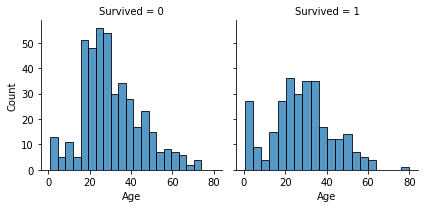

In [100]:
g = sns.FacetGrid(train_df, col='Survived',height=3)
g.map(sns.histplot, 'Age', bins=20)

*Observaciones del histograma*
- Los infantes (menores o iguales a 4 años) tuvieron una alta taza de sobrevivencia
- Los adultos mayores cercano a 80 años sobrevivieron (no hay muertos)
- El porcentaje mayor de fallecidos estan entre los 15 y 25 años
- La mayor parte de los pasajeros estaba entre los 15 a 35 años

*Desiciones sobre la variable*
- El supuesto de que la variable era correlativa y sirve para el modelo de entrenamiento esta demostrada
- Se debe completar los datos nulos
- Se debe agrupar por edades para facilitar el analisis.


**Correlación de características numéricas y ordinales**

Podemos combinar múltiples características para identificar correlaciones usando una sola gráfica. Esto se puede hacer con características numéricas y categóricas que tienen valores numéricos.

c:\Users\kozzx\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


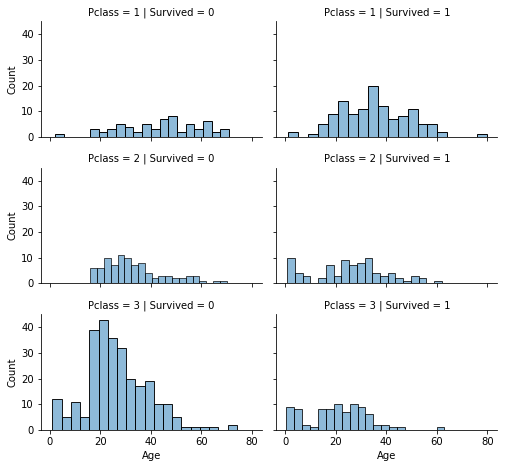

In [101]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(sns.histplot, 'Age', alpha=.5, bins=20,)
grid.add_legend();

*Observaciones del histograma*
- Pclass=3 tenía la mayoría de los pasajeros, sin embargo, la mayoría no sobrevivió. Confirma nuestra suposición
- Los pasajeros bebés en Pclass=2 y Pclass=3 sobrevivieron en su mayoría. Califica aún más nuestro supuesto del histograma anterior.
- La mayoría de los pasajeros de Pclass=1 sobrevivieron. Confirma nuestra suposición.
- Pclass varía en términos de distribución de edad de los pasajeros

*Desiciones sobre la variable*
- El supuesto de que la variable era correlativa y sirve para el modelo de entrenamiento esta demostrada

**Correlación de características categóricas (duales)**
Ahora debemos ver si estas caracteristicas sirven para el modelo. 
Para esto toma las caracteristica de sexo y puerto de embarque

c:\Users\kozzx\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\kozzx\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\kozzx\anaconda3\lib\site-packages\seaborn\axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


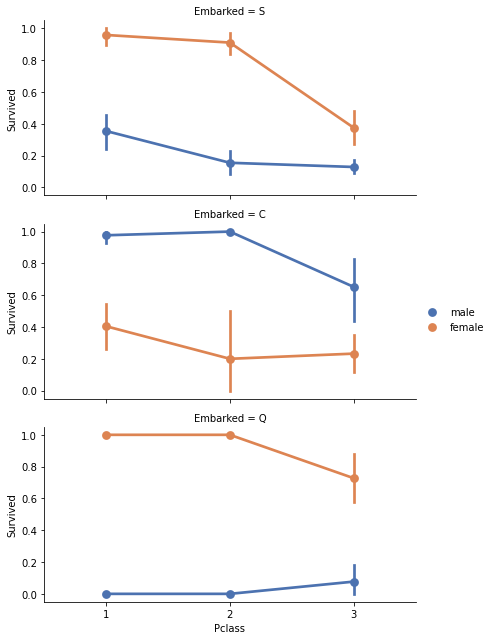

In [102]:
grid = sns.FacetGrid(train_df, row='Embarked', size=3, aspect=2)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

*Observaciones del histograma*
- Las mujeres tienen mayor supervivencia que los hombres como se puso en las supociones.
- Esto se cumple menos en el puerto c
- De los puertos de embarques si se hace diferencia en cuanto a la cantidad de hombres que sobreviven

*Desiciones sobre la variable*
- El supuesto de que la variable era correlativa y sirve para el modelo de entrenamiento esta demostrada

**Correlación de características categóricas y numéricas** (me falta editar)

También podemos querer correlacionar características categóricas (con valores no numéricos) y características numéricas. Podemos considerar correlacionar Embarcado (Categórico no numérico), Sexo (Categórico no numérico), Tarifa (Numérico continuo), con Superviviente (Categórico numérico).

Observaciones.

    Los pasajeros que pagaban tarifas más altas tenían una mejor supervivencia. Confirma nuestra suposición para crear rangos de tarifas (#4).
    El puerto de embarque se correlaciona con las tasas de supervivencia. Confirma correlacionando (#1) y completando (#2).

Decisiones.

    Considere la función de tarifa de bandas.

c:\Users\kozzx\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\kozzx\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


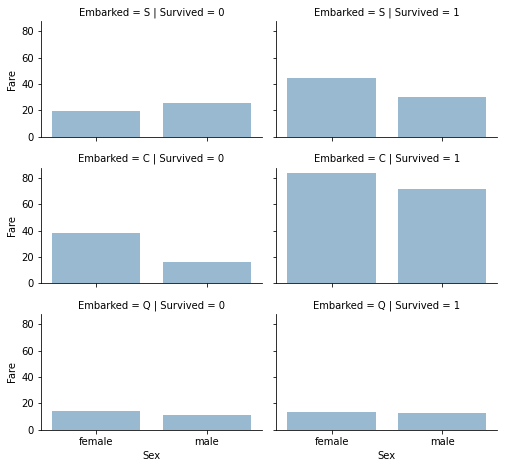

In [103]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

### Decisiones sobre los Datos

Se han recopilado varias suposiciones y decisiones con respecto a nuestros conjuntos de datos y requisitos de solución. Hasta ahora no tuvimos que cambiar una sola característica o valor para llegar a estos. Ejecutemos ahora nuestras decisiones y suposiciones para corregir, crear y completar objetivos
 
**Eliminacion de datos que no sirven**

Con las deciciones que se anteriormente y para eliminar cualquier problema a con el modelo se elimina la variable "cabin", ID de pasajero y su nombre de train y test. Esto es porque faltan muchos datos y no es relevante. 

In [104]:
print("ANTES DE ELIMINAR", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)
train_df = train_df.drop(['Ticket', 'Cabin','Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin','Name'], axis=1)
combine = [train_df, test_df]
print("DESPUES DE ELIMINAR", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

ANTES DE ELIMINAR (891, 12) (418, 11) (891, 12) (418, 11)
DESPUES DE ELIMINAR (891, 8) (418, 8) (891, 8) (418, 8)


**Creación de nuevas características extrayendo de las existentes**

1. La variable "sex" esta en forma de objeto y para el analisis se necesita como entero por lo que se debe cambiar

In [105]:
train_df['Sex']=train_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
test_df['Sex']=test_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


2. La variable Age no posee todos los datos, por lo que la mejor forma es darselo aleatoriamente en funcion del Sex y Pclass.
Primero se efectuara una matriz vacia que aloje los datos.

In [106]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

Ahora iteramos sobre Sex (0 o 1) y Pclass (1, 2, 3) para calcular los valores estimados de Age para las seis combinaciones.

In [108]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()

          
            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22,1,0,7.2500,S
1,1,1,1,38,1,0,71.2833,C
2,1,3,1,26,0,0,7.9250,S
3,1,1,1,35,1,0,53.1000,S
4,0,3,0,35,0,0,8.0500,S


Ahora creo una variable de correlacion con la Age y sobreviviente

In [109]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


a continuacion reemplazo Age con la base ordinaria en las bandas 

In [110]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeBand
0,0,3,0,1,1,0,7.2500,S,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,"(32.0, 48.0]"


Remuevo AgeBand de la base de dato

In [111]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,1,1,0,7.2500,S
1,1,1,1,2,1,0,71.2833,C
2,1,3,1,1,0,0,7.9250,S
3,1,1,1,2,1,0,53.1000,S
4,0,3,0,2,0,0,8.0500,S


Compruebo que existan todos los datos 

In [112]:
train_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

3. Crear una nueva función combinando funciones existentes

Podemos crear una nueva función para FamilySize que combine Parch y SibSp. Esto nos permitirá eliminar Parch y SibSp de nuestros conjuntos de datos.

In [113]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


creamos una funcion llamada IsAlone

In [114]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


a continuacion borramos Parch y sisip y dejamos Is ALone

In [115]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,0,3,0,1,7.2500,S,0
1,1,1,1,2,71.2833,C,0
2,1,3,1,1,7.9250,S,1
3,1,1,1,2,53.1000,S,0
4,0,3,0,2,8.0500,S,1


También podemos crear una característica artificial combinando Pclass y Age

In [116]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass
train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


4. Completar una característica categórica

La característica de embarcado toma valores S, Q, C basados en el puerto de embarque. Nuestro conjunto de datos de entrenamiento tiene dos valores faltantes. Simplemente llenamos estos con la ocurrencia más común.

In [117]:
train_df.Embarked.dropna().mode()[0]

'S'

In [118]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)



,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [120]:
train_df.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age          0
Fare         0
Embarked     0
IsAlone      0
Age*Class    0
dtype: int64

Ahora con todos los datos transformo la variable de embarque en una variable entera y poder analizarla

In [121]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,0,3
1,1,1,1,2,71.2833,1,0,2
2,1,3,1,1,7.9250,0,1,3
3,1,1,1,2,53.1000,0,0,2
4,0,3,0,2,8.0500,0,1,6


5. Verificacion del test.

Verificare los datos de test

In [122]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           1
Embarked       0
IsAlone        0
Age*Class      0
dtype: int64

Ahora podemos completar la función Tarifa para el valor faltante único en el modo de uso del conjunto de datos de prueba para obtener el valor que ocurre con más frecuencia para esta función. Hacemos esto en una sola línea de código.

Tenga en cuenta que no estamos creando una nueva característica intermedia ni haciendo ningún análisis adicional de correlación para adivinar la característica que falta, ya que estamos reemplazando solo un valor. El objetivo de finalización logra el requisito deseado para que el algoritmo del modelo opere en valores no nulos.

También podemos querer redondear la tarifa a dos decimales, ya que representa la moneda.

In [123]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,6
1,893,3,1,2,7.0000,0,0,6
2,894,2,0,3,9.6875,2,1,6
3,895,3,0,1,8.6625,0,1,3
4,896,3,1,1,12.2875,0,0,3


In [124]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [125]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone,Age*Class
0,0,3,0,1,0,0,0,3
1,1,1,1,2,3,1,0,2
2,1,3,1,1,1,0,1,3
3,1,1,1,2,3,0,0,2
4,0,3,0,2,1,0,1,6
5,0,3,0,1,1,2,1,3
6,0,1,0,3,3,0,1,3
7,0,3,0,0,2,0,0,0
8,1,3,1,1,1,0,0,3
9,1,2,1,0,2,1,0,0


In [126]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,IsAlone,Age*Class
0,892,3,0,2,0,2,1,6
1,893,3,1,2,0,0,0,6
2,894,2,0,3,1,2,1,6
3,895,3,0,1,1,0,1,3
4,896,3,1,1,1,0,0,3
5,897,3,0,0,1,0,1,0
6,898,3,1,1,0,2,1,3
7,899,2,0,1,2,0,0,2
8,900,3,1,1,0,1,1,3
9,901,3,0,1,2,0,0,3


## 3. Modela, predice y resuelve

Ahora estamos listos para entrenar un modelo y predecir la solución requerida. Hay más de 60 algoritmos de modelado predictivo para elegir. Debemos comprender el tipo de problema y el requisito de solución para reducirnos a unos pocos modelos seleccionados que podamos evaluar. Nuestro problema es un problema de clasificación y regresión. Queremos identificar la relación entre la salida (Sobrevivió o no) con otras variables o características (Género, Edad, Puerto...). También estamos realizando una categoría de aprendizaje automático que se llama aprendizaje supervisado, ya que estamos entrenando nuestro modelo con un conjunto de datos determinado. Con estos dos criterios: aprendizaje supervisado más clasificación y regresión, podemos reducir nuestra elección de modelos a unos pocos. Éstos incluyen:

    - Logistic Regression
    - KNN or k-Nearest Neighbors
    - Support Vector Machines
    - Naive Bayes classifier
    - Decision Tree
    - Random Forrest
    - Perceptron
    - Artificial neural network
    - RVM or Relevance Vector Machine


In [127]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

La **regresión logística** es un tipo de análisis de regresión utilizado para predecir el resultado de una variable categórica (una variable que puede adoptar un número limitado de categorías) en función de las variables independientes o predictoras. Referencia wikipedia

In [128]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

79.24

Las **máquinas de vectores de soporte o máquinas de vector soporte** (del inglés support-vector machines, SVM) son un conjunto de algoritmos de aprendizaje supervisado desarrollados por Vladimir Vapnik y su equipo en los laboratorios de AT&T Bell.

Estos métodos están propiamente relacionados con problemas de clasificación y regresión. Dado un conjunto de ejemplos de entrenamiento (de muestras) podemos etiquetar las clases y entrenar una SVM para construir un modelo que prediga la clase de una nueva muestra. Intuitivamente, una SVM es un modelo que representa a los puntos de muestra en el espacio, separando las clases a 2 espacios lo más amplios posibles mediante un hiperplano de separación definido como el vector entre los 2 puntos, de las 2 clases, más cercanos al que se llama vector soporte. Cuando las nuevas muestras se ponen en correspondencia con dicho modelo, en función de los espacios a los que pertenezcan, pueden ser clasificadas a una o la otra clase. 

In [129]:

# Support Vector Machines
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc


76.54

k vecinos más próximos


El método de los k vecinos más cercanos (en inglés, k-nearest neighbors, abreviado k {\displaystyle k} k-nn)1​ es un método de clasificación supervisada (Aprendizaje, estimación basada en un conjunto de entrenamiento y prototipos) que sirve para estimar la función de densidad F ( x / C j ) {\displaystyle F(x/Cj)} {\displaystyle F(x/Cj)} de las predictoras x {\displaystyle x} x por cada clase C j {\displaystyle C_{j}} {\displaystyle C_{j}}.

Este es un método de clasificación no paramétrico, que estima el valor de la función de densidad de probabilidad o directamente la probabilidad a posteriori de que un elemento x {\displaystyle x} x pertenezca a la clase C j {\displaystyle C_{j}} {\displaystyle C_{j}} a partir de la información proporcionada por el conjunto de prototipos. En el proceso de aprendizaje no se hace ninguna suposición acerca de la distribución de las variables predictoras. 

In [130]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.06

En el aprendizaje automático, los clasificadores de Bayes ingenuos son una familia de clasificadores probabilísticos simples basados en la aplicación del teorema de Bayes con fuertes suposiciones de independencia (ingenua) entre las características. Los clasificadores Naive Bayes son altamente escalables y requieren una cantidad de parámetros lineales en la cantidad de variables (características) en un problema de aprendizaje. Referencia Wikipedia.

El puntaje de confianza generado por el modelo es el más bajo entre los modelos evaluados hasta ahora.

In [132]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

68.01

El perceptrón es un algoritmo para el aprendizaje supervisado de clasificadores binarios (funciones que pueden decidir si una entrada, representada por un vector de números, pertenece o no a una clase específica). Es un tipo de clasificador lineal, es decir, un algoritmo de clasificación que hace sus predicciones basándose en una función predictora lineal que combina un conjunto de pesos con el vector de características. El algoritmo permite el aprendizaje en línea, ya que procesa elementos en el conjunto de entrenamiento uno a la vez. 

In [133]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

60.27

In [134]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

c:\Users\kozzx\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


79.24

In [135]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd


70.03

Este modelo utiliza un árbol de decisiones como modelo predictivo que asigna características (ramas de árboles) a conclusiones sobre el valor objetivo (hojas de árboles). Los modelos de árbol en los que la variable de destino puede tomar un conjunto finito de valores se denominan árboles de clasificación; en estas estructuras de árbol, las hojas representan etiquetas de clase y las ramas representan conjunciones de características que conducen a esas etiquetas de clase. Los árboles de decisión en los que la variable objetivo puede tomar valores continuos (normalmente números reales) se denominan árboles de regresión. Referencia Wikipedia.

La puntuación de confianza del modelo es la más alta entre los modelos evaluados hasta ahora.

In [136]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

85.75

El próximo modelo Random Forests es uno de los más populares. Los bosques aleatorios o los bosques de decisiones aleatorias son un método de aprendizaje conjunto para clasificación, regresión y otras tareas, que operan mediante la construcción de una multitud de árboles de decisión (n_estimadores = 100) en el momento del entrenamiento y la salida de la clase que es el modo de las clases (clasificación) o predicción media (regresión) de los árboles individuales. Referencia Wikipedia.

La puntuación de confianza del modelo es la más alta entre los modelos evaluados hasta ahora. Decidimos utilizar la salida de este modelo (Y_pred) para crear la presentación de resultados de nuestra competencia.

In [137]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

85.75

### 4. Evaluacion del modelo

In [138]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,85.75
8,Decision Tree,85.75
1,KNN,84.06
2,Logistic Regression,79.24
7,Linear SVC,79.24
0,Support Vector Machines,76.54
6,Stochastic Gradient Decent,70.03
4,Naive Bayes,68.01
5,Perceptron,60.27


Ahora podemos clasificar nuestra evaluación de todos los modelos para elegir el mejor para nuestro problema. Si bien Decision Tree y Random Forest tienen la misma puntuación, elegimos usar Random Forest ya que corrigen el hábito de los árboles de decisión de sobreajustarse a su conjunto de entrenamiento.

Nuestro envío al sitio de la competencia Kaggle da como resultado una puntuación de 3883 de 6082 entradas a la competencia. Este resultado es orientativo mientras se desarrolla la competición. Este resultado solo representa una parte del conjunto de datos de presentación. No está mal para nuestro primer intento. Cualquier sugerencia para mejorar nuestra puntuación es bienvenida.